### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python

# Scenario
Turtle Games's marketing department prefers Python for data analysis. As you are fluent in Python, the department has asked you to assist with the analysis of marketing data. It wants to better understand:

1. how users accumulate loyalty point
2. and how this information can be used by the marketing department.

# Objective
investigate the possible **relationships between the loyalty points, age, remuneration, and spending scores**. You are expected to comment on observed trends, interpret the observations, and propose marketing priorities and decisions that can be justified based on your observations. \
*it is strongly encouraged to first clean the data as per the provided guidelines and then save a copy of the clean data for future use.

# From the objective, we can conclude that Y(dependent variable) should be loyalty points, while Xs (dependents) should be age, remuneration and spending scores.

# Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.



## 1. Load and explore the data

In [1]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.b
import warnings  
warnings.filterwarnings('ignore')  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# Load the CSV file (house_price.csv).
tr = pd.read_csv('turtle_reviews.csv')  

# Print the DataFrame.
tr.head() 

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

# Any missing values
Non-null values found among the tr columns

In [197]:
tr.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [198]:
# Explore the data.
tr.shape

(2000, 11)

In [199]:
# Basic descriptive statistics.

In [200]:
# All statistics in call
tr.describe().round(0)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.0             2000.0                  2000.0          2000.0   
mean     39.0               48.0                    50.0          1578.0   
std      14.0               23.0                    26.0          1283.0   
min      17.0               12.0                     1.0            25.0   
25%      29.0               30.0                    32.0           772.0   
50%      38.0               47.0                    50.0          1276.0   
75%      49.0               64.0                    73.0          1751.0   
max      72.0              112.0                    99.0          6847.0   

       product  
count   2000.0  
mean    4321.0  
std     3149.0  
min      107.0  
25%     1589.0  
50%     3624.0  
75%     6654.0  
max    11086.0

## 2. Drop columns

In [201]:
# Drop unnecessary columns.
# the objective is to investigate the relationship between investigate the possible relationships between:
# loyalty points (Y) and Xs = age, remuneration, and spending scores
# View column names.
tr.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [202]:
# Drop unnecessary columns
tr2= tr.drop(['gender', 'education','language','platform','product','review','summary'],axis=1)

In [203]:
tr2.head()

age  remuneration (k£)  spending_score (1-100)  loyalty_points
0   18              12.30                      39             210
1   23              12.30                      81             524
2   22              13.12                       6              40
3   25              13.12                      77             562
4   33              13.94                      40             366

## 3. Rename columns

In [204]:
# Rename the remaining columns
tr2.rename(columns={'remuneration (k£)': 'remuneration','spending_score (1-100)':'spending_score'}, inplace=True)
tr2.head(5)


age  remuneration  spending_score  loyalty_points
0   18         12.30              39             210
1   23         12.30              81             524
2   22         13.12               6              40
3   25         13.12              77             562
4   33         13.94              40             366

## 4. Save the DataFrame as a CSV file

In [205]:
# Save tr2 to a CSV file
tr2.to_csv('tr2_file.csv', index=False)  # Set index=False to exclude index from the CSV

print("tr2 saved to 'tr2_file.csv'")

# Import new CSV file with Pandas.
tr3 = pd.read_csv('tr2_file.csv')  

# Print the DataFrame.
tr3.head(5)


tr2 saved to 'tr2_file.csv'


age  remuneration  spending_score  loyalty_points
0   18         12.30              39             210
1   23         12.30              81             524
2   22         13.12               6              40
3   25         13.12              77             562
4   33         13.94              40             366

## 5. Linear regression

### 5a) spending vs loyalty

In [206]:
# Define the dependent variable.
y = tr2['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = tr2['spending_score'].values.reshape(-1, 1) 



Visual Description: The scatterplot appears as a fan shape or a cone, but in reverse. As the predicted values increase, the spread or dispersion of the data points widens.
Implication: This suggests that the variability of the dependent variable (y) is not constant across the range of the independent variable (X). In other words, the error terms (residuals) in the model have unequal variances.

In [207]:
# Import the necessary package.
from sklearn.linear_model import LinearRegression

# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 


LinearRegression()

Data partitioning (1.1.6 Forecasting and predictive modelling), or splitting the data, before building the model is a general technique used in ML that allows data analysts to evaluate the performance of their models. To recap, a data set is typically split into two sets, a training set and a testing set. In some cases for more advanced models, data can be split into three sets: training, testing, and validation. Data partitioning is determined by a number of factors, and there is no single rule that can be implemented in all cases. Some of the elements to keep track of are the size and characteristics of the data set that you are working with and the algorithm or models selected. Machine learning models are typically trained on very large data sets, and typical standards of 70/30 or 80/20 splits are used for training vs testing data. In the example below, we deviate from standard practices in order to demonstrate the principle by applying the technique to a very small data set and using a 50/50 split for training vs testing data.

In [208]:
# Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variables.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.5,
                                                    random_state=100)

In [209]:

# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.


array([[2305.38925169],
       [1941.71062585],
       [ 982.92152134],
       [2470.69771798],
       [2007.83401236],
       [2272.32755843],
       [3131.93158316],
       [2999.68481012],
       [1082.10660112],
       [ 387.81104269],
       [ 586.18120224],
       [1611.09369326],
       [1743.34046629],
       [2735.19126405],
       [ 453.93442921],
       [2107.01909214],
       [2437.63602473],
       [1578.032     ],
       [2536.8211045 ],
       [1809.46385281],
       [ 982.92152134],
       [1875.58723933],
       [2173.14247866],
       [  90.25580336],
       [2999.68481012],
       [ 586.18120224],
       [1842.52554607],
       [3065.80819664],
       [1743.34046629],
       [ 156.37918988],
       [1412.72353371],
       [1743.34046629],
       [1280.47676067],
       [2073.95739888],
       [1644.15538652],
       [ 420.87273595],
       [1743.34046629],
       [ 387.81104269],
       [2834.37634383],
       [1611.09369326],
       [3198.05496967],
       [1743.340

Import the train_test_split module from sklearn.model_selection.
Create a variable (e.g. x_train, x_test, y_train, y_test) to store the split of the data set based on the variables, into train and test subsets.
Use the train_test_split() method to split the data.
Inside the bracket, specify the variables as x and y, train_size as 50% (e.g. 0.5), and the random_state as 100. The random_state parameter is used for reproducibility. This ensures that the same random split is generated every time the train_test_split function is called or whenever the notebook is run. This is useful for reproducing the same results, irrespective of who runs the notebook. 

In [210]:
# Fit the model once again with the train data

lm.fit(x_train, y_train)

LinearRegression()

In [211]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.

array([[2255.2495456 ],
       [1902.25170694],
       [ 971.62104139],
       [2415.70310863],
       [1966.43313215],
       [2223.15883299],
       [3057.51736073],
       [2929.15451031],
       [1067.89317921],
       [ 393.9882145 ],
       [ 586.53249013],
       [1581.34458089],
       [1709.70743131],
       [2672.42880947],
       [ 458.16963971],
       [2062.70526997],
       [2383.61239602],
       [1549.25386829],
       [2479.88453384],
       [1773.88885652],
       [ 971.62104139],
       [1838.07028173],
       [2126.88669518],
       [ 105.17180105],
       [2929.15451031],
       [ 586.53249013],
       [1805.97956913],
       [2993.33593552],
       [1709.70743131],
       [ 169.35322626],
       [1388.80030526],
       [1709.70743131],
       [1260.43745484],
       [2030.61455736],
       [1613.4352935 ],
       [ 426.0789271 ],
       [1709.70743131],
       [ 393.9882145 ],
       [2768.70094728],
       [1581.34458089],
       [3121.69878594],
       [1709.707

In [212]:
#Evaluate the goodness of fit of the model on the training data

# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.4317338448587462
Intercept value:  [-55.28176197]
Coefficient value:  [[32.09071261]]


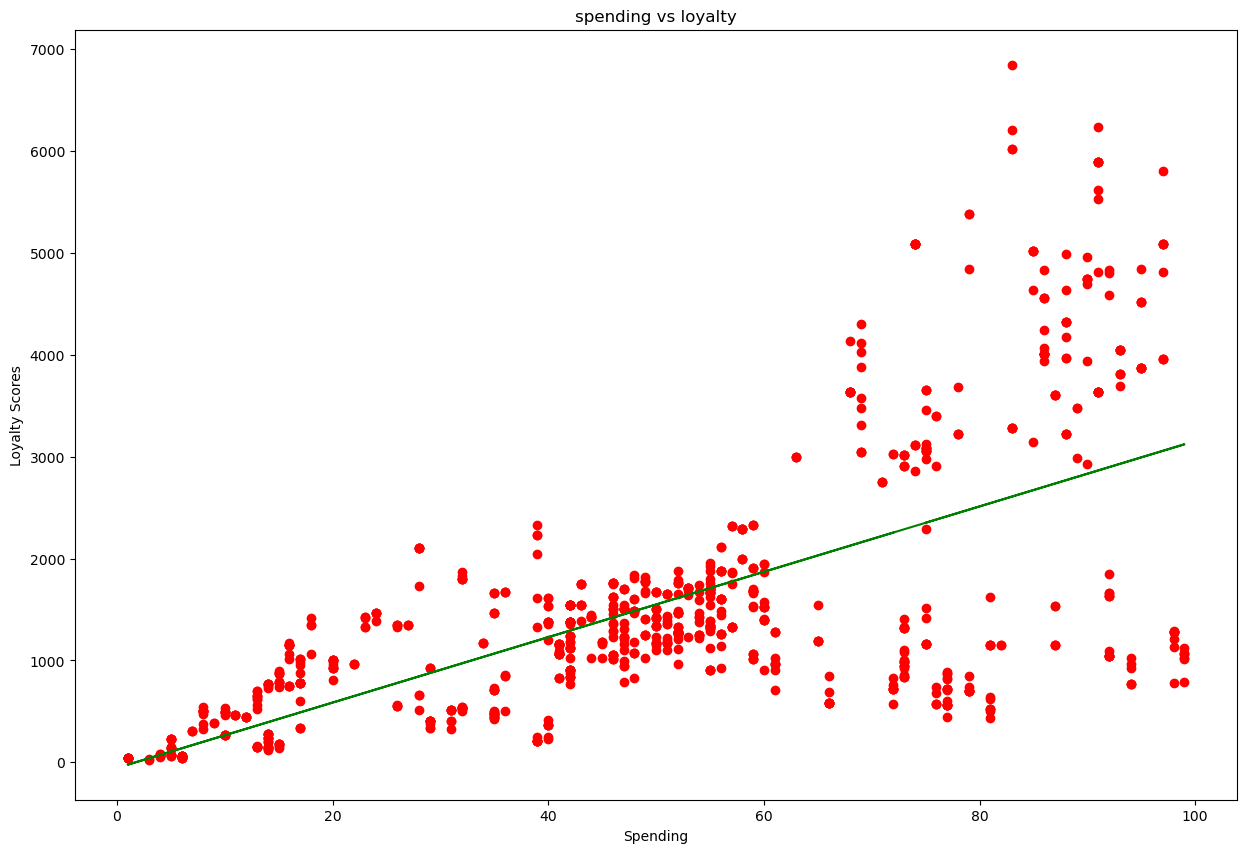

In [213]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("spending vs loyalty")
plt.xlabel("Spending")
plt.ylabel("Loyalty Scores") 

# Print the graph. 
plt.show() 

# Conclusion: Spending vs Loyalty
The R-squared indicates that changes in spending can explain 43.17% of the variability in loyalty points.
The coefficient of 32.09 indicates that for each unit increase in spending_score, the loyalty points increase by 32.09 units. 
The intercept of 55.28 implies loyalty points could be negative when the spending score is zero, which doesn’t have a practical meaning.
## Overall, significant positive relationship between spending score and loyalty points. 


### 5b) renumeration vs loyalty

In [214]:

# Define the dependent variable.
y = tr2['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = tr2['remuneration'].values.reshape(-1, 1) 

In [215]:
# Import the necessary package.
from sklearn.linear_model import LinearRegression

# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 


LinearRegression()

In [216]:
# Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variables.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.5,
                                                    random_state=100)

In [217]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.


array([[2008.83073768],
       [ 719.26596036],
       [ 719.26596036],
       [ 382.85775758],
       [2373.27295735],
       [1952.76270388],
       [2709.68116013],
       [2036.86475457],
       [2149.00082217],
       [ 719.26596036],
       [2345.23894045],
       [1448.15039971],
       [1588.3204842 ],
       [2821.81722772],
       [2120.96680527],
       [ 523.02784207],
       [ 410.89177448],
       [1167.81023073],
       [3298.39551499],
       [1448.15039971],
       [ 719.26596036],
       [1251.91228142],
       [2765.74919393],
       [ 635.16390966],
       [2205.06885596],
       [2345.23894045],
       [1868.66065318],
       [1924.72868698],
       [1223.87826452],
       [1980.79672078],
       [1139.77621383],
       [1448.15039971],
       [1139.77621383],
       [1027.64014624],
       [1448.15039971],
       [2401.30697425],
       [1055.67416313],
       [ 466.95980827],
       [2681.64714323],
       [1223.87826452],
       [ 466.95980827],
       [1307.980

In [218]:
# Fit the model once again with the train data

lm.fit(x_train, y_train)

LinearRegression()

In [219]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.

array([[1975.35531635],
       [ 740.41971205],
       [ 740.41971205],
       [ 418.26259788],
       [2324.3588567 ],
       [1921.66246399],
       [2646.51597087],
       [2002.20174253],
       [2109.58744725],
       [ 740.41971205],
       [2297.51243052],
       [1438.42679274],
       [1572.65892364],
       [2753.90167559],
       [2082.74102107],
       [ 552.49472878],
       [ 445.10902406],
       [1169.96253094],
       [3210.29092066],
       [1438.42679274],
       [ 740.41971205],
       [1250.50180948],
       [2700.20882323],
       [ 659.88043351],
       [2163.28029962],
       [2297.51243052],
       [1841.12318545],
       [1894.81603781],
       [1223.6553833 ],
       [1948.50889017],
       [1143.11610476],
       [1438.42679274],
       [1143.11610476],
       [1035.73040003],
       [1438.42679274],
       [2351.20528288],
       [1062.57682621],
       [ 498.80187642],
       [2619.66954468],
       [1223.6553833 ],
       [ 498.80187642],
       [1304.194

In [220]:
#Evaluate the goodness of fit of the model on the training data

# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.356737353285977
Intercept value:  [-11.28022101]
Coefficient value:  [[32.73954412]]


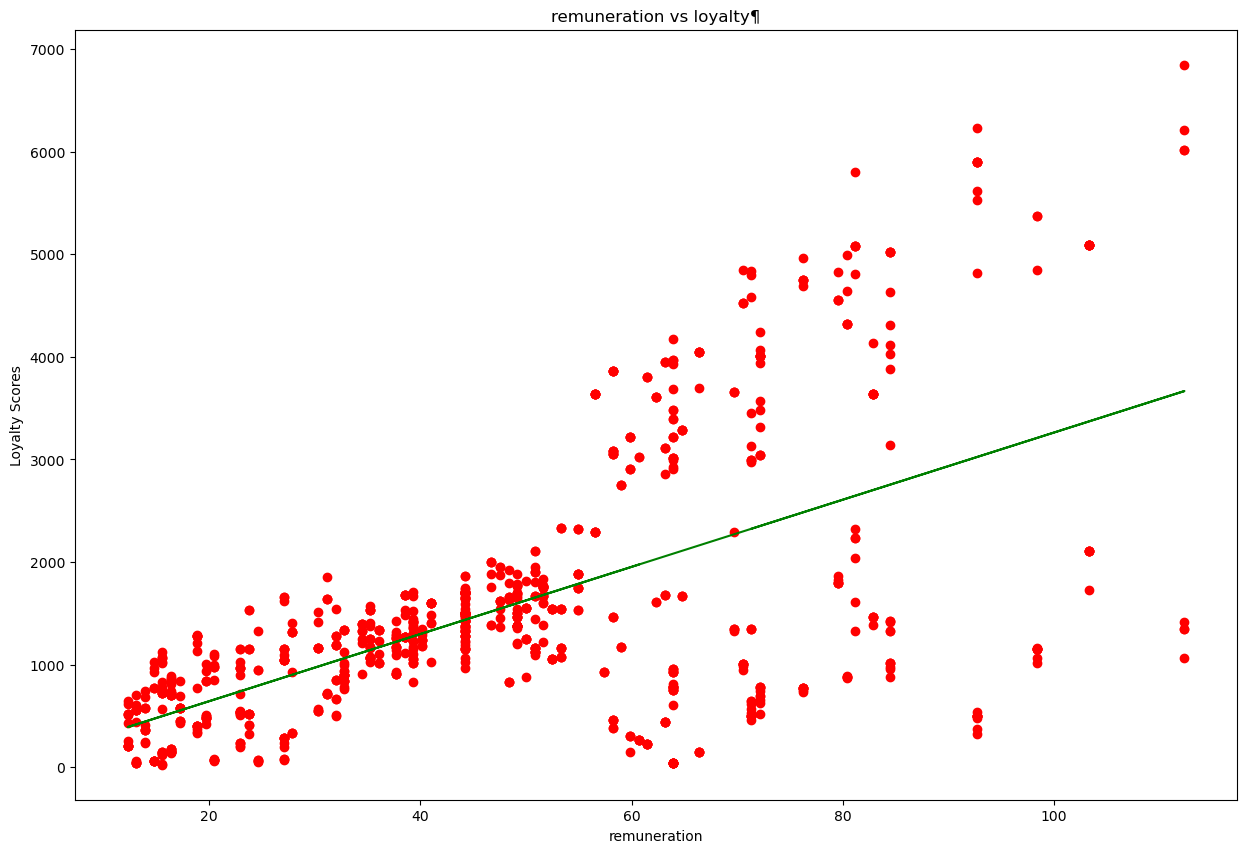

In [221]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("remuneration vs loyalty¶")
plt.xlabel("remuneration")
plt.ylabel("Loyalty Scores") 

# Print the graph. 
plt.show() 

# Conclusion: remuneration vs loyalty
The R-squared suggests changes in remuneration can explain around 35.67% of the variability in loyalty points.
The coefficient of 32.74, for every unit increase in remuneration, the loyalty points increase by 32.74 units.
The intercepts suggests that the estimated loyalty points are around -11.28 when remuneration is zero, what is not practically meaningful.
## Overall positive but weak relationship between remuneration and loyalty points.


### 5c) age vs loyalty

In [222]:
# Define the dependent variable.
y = tr2['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = tr['age'].values.reshape(-1, 1) 

In [223]:

# Import the necessary package.
from sklearn.linear_model import LinearRegression

# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 


LinearRegression()

In [224]:
# Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variables.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.5,
                                                    random_state=100)

In [225]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.


array([[1588.04394885],
       [1588.04394885],
       [1551.9287025 ],
       [1636.19761065],
       [1600.0823643 ],
       [1604.09516945],
       [1608.1079746 ],
       [1600.0823643 ],
       [1515.81345615],
       [1523.83906645],
       [1576.0055334 ],
       [1511.800651  ],
       [1455.6213789 ],
       [1584.0311437 ],
       [1555.94150765],
       [1648.2360261 ],
       [1584.0311437 ],
       [1535.8774819 ],
       [1455.6213789 ],
       [1523.83906645],
       [1588.04394885],
       [1523.83906645],
       [1608.1079746 ],
       [1559.9543128 ],
       [1604.09516945],
       [1576.0055334 ],
       [1584.0311437 ],
       [1584.0311437 ],
       [1664.2872467 ],
       [1567.9799231 ],
       [1539.89028705],
       [1584.0311437 ],
       [1539.89028705],
       [1632.1848055 ],
       [1668.30005185],
       [1507.78784585],
       [1455.6213789 ],
       [1584.0311437 ],
       [1620.14639005],
       [1620.14639005],
       [1600.0823643 ],
       [1620.146

In [226]:
# Fit the model once again with the train data

lm.fit(x_train, y_train)

LinearRegression()

In [227]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred
#The output indicates the predicted values of the train data set. Let's visualise the model.

array([[1559.04563041],
       [1559.04563041],
       [1552.36465501],
       [1567.95359762],
       [1561.27262221],
       [1562.01495281],
       [1562.75728341],
       [1561.27262221],
       [1545.6836796 ],
       [1547.1683408 ],
       [1556.81863861],
       [1544.941349  ],
       [1534.54872059],
       [1558.30329981],
       [1553.10698561],
       [1570.18058942],
       [1558.30329981],
       [1549.3953326 ],
       [1534.54872059],
       [1547.1683408 ],
       [1559.04563041],
       [1547.1683408 ],
       [1562.75728341],
       [1553.84931621],
       [1562.01495281],
       [1556.81863861],
       [1558.30329981],
       [1558.30329981],
       [1573.14991182],
       [1555.33397741],
       [1550.1376632 ],
       [1558.30329981],
       [1550.1376632 ],
       [1567.21126702],
       [1573.89224243],
       [1544.1990184 ],
       [1534.54872059],
       [1558.30329981],
       [1564.98427522],
       [1564.98427522],
       [1561.27262221],
       [1564.984

In [228]:

#Evaluate the goodness of fit of the model on the training data

# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  6.384737472275859e-05
Intercept value:  [1586.51186264]
Coefficient value:  [[-0.7423306]]


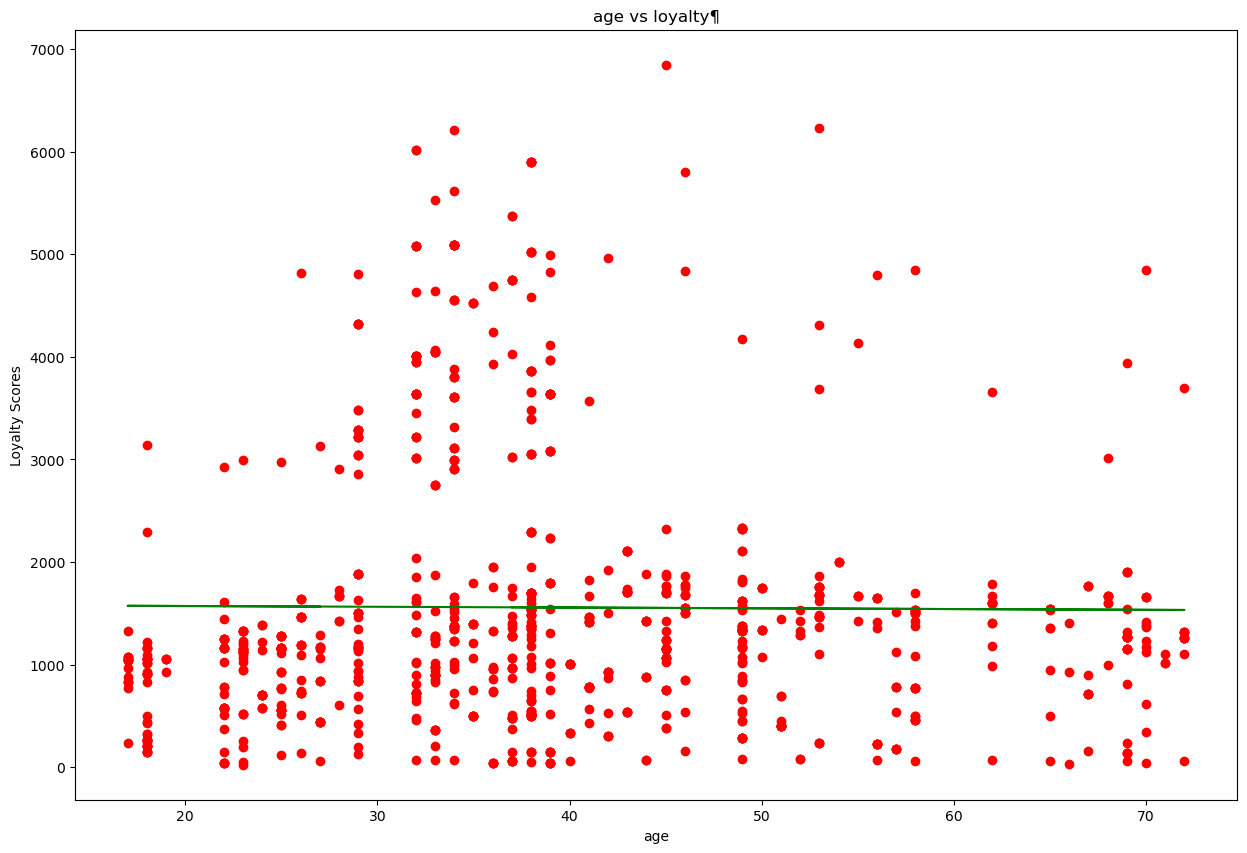

In [229]:

# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("age vs loyalty¶")
plt.xlabel("age")
plt.ylabel("Loyalty Scores") 

# Print the graph. 
plt.show() 

# Conclusion: age vs Loyalty
R-squared is very low (0.000064), indicating age explains minimal variability in loyalty points.
Coefficient: also very low (0.000086), implying a tiny decrease in loyalty points for each year increase in age.
Overall: Age and loyalty points display an extremely weak if any, relationship.

## 6. Observations and insights

***Your observations here...***






# Spending is the strongest indicator of loyalty variablitity , followed by spending. Age has a very weak, if not inexisting impact on loyalty score



# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [230]:
# Import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Your existing code
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt


# Import tree-related libraries
from sklearn.tree import plot_tree  # Plot decision trees.
from sklearn import tree  # Decision tree algorithm.
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier.
from sklearn.tree import DecisionTreeRegressor  # Decision tree regressor.
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 


# Settings for the notebook
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]


In [231]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('tr2_file.csv')

# View DataFrame.
df2.head(5)

age  remuneration  spending_score  loyalty_points
0   18         12.30              39             210
1   23         12.30              81             524
2   22         13.12               6              40
3   25         13.12              77             562
4   33         13.94              40             366

In [232]:
df2.columns

Index(['age', 'remuneration', 'spending_score', 'loyalty_points'], dtype='object')

In [233]:
# Select necessary columns. 
X = df2.drop('loyalty_points', axis = 1)
y = df2['loyalty_points']

In [234]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create classifier
reg = DecisionTreeRegressor(random_state=42)

# Fit the training data
reg.fit(X_train, y_train)


(1400, 3) (1400,) (600, 3) (600,)


DecisionTreeRegressor(random_state=42)

In [235]:
# Test and Train data
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# Calculate MAE
train_mae = mean_absolute_error(y_train, y_train_predict)
test_mae = mean_absolute_error(y_test, y_test_predict)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MAE: 0.0
Test MAE: 26.175
Train R-squared: 1.0
Test R-squared: 0.9960547369776616


# Plot the Tree

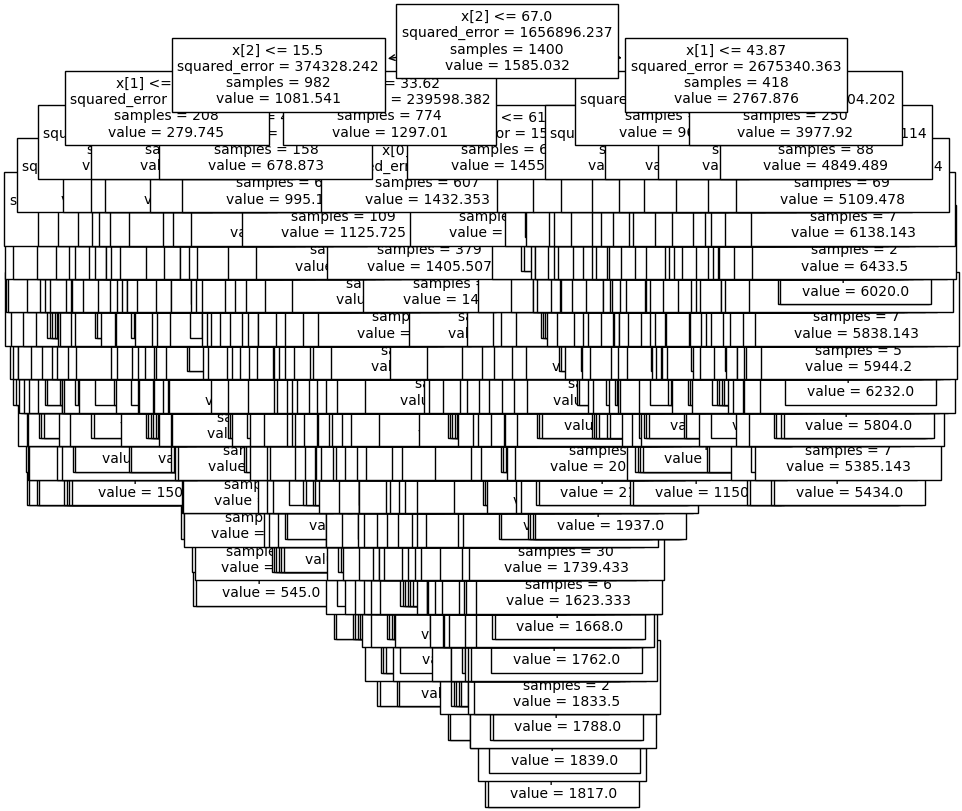

In [236]:
# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(reg, fontsize=10)
plt.show()

# Importance of the variables

In [237]:
# importance of each variable 
dtc_input = reg
importance = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(dtc_input.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False)
importance

feature  importance
1    remuneration       0.498
2  spending_score       0.484
0             age       0.018

In [238]:
# Review X and Y.
print(y)

X

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64


age  remuneration  spending_score
0      18         12.30              39
1      23         12.30              81
2      22         13.12               6
3      25         13.12              77
4      33         13.94              40
...   ...           ...             ...
1995   37         84.46              69
1996   43         92.66               8
1997   34         92.66              91
1998   34         98.40              16
1999   32         92.66               8

[2000 rows x 3 columns]

In [239]:
# Split  data -  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#  classifier
reg = DecisionTreeRegressor(random_state=42)

# Fit the training data
reg.fit(X_train, y_train)

(1400, 3) (1400,) (600, 3) (600,)


DecisionTreeRegressor(random_state=42)

In [240]:
# Predict model - Test and Train data
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# Calculate MAE
train_mae = mean_absolute_error(y_train, y_train_predict)
test_mae = mean_absolute_error(y_test, y_test_predict)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

# Calculate  R-squared
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MAE: 0.0
Test MAE: 26.175
Train R-squared: 1.0
Test R-squared: 0.9960547369776616


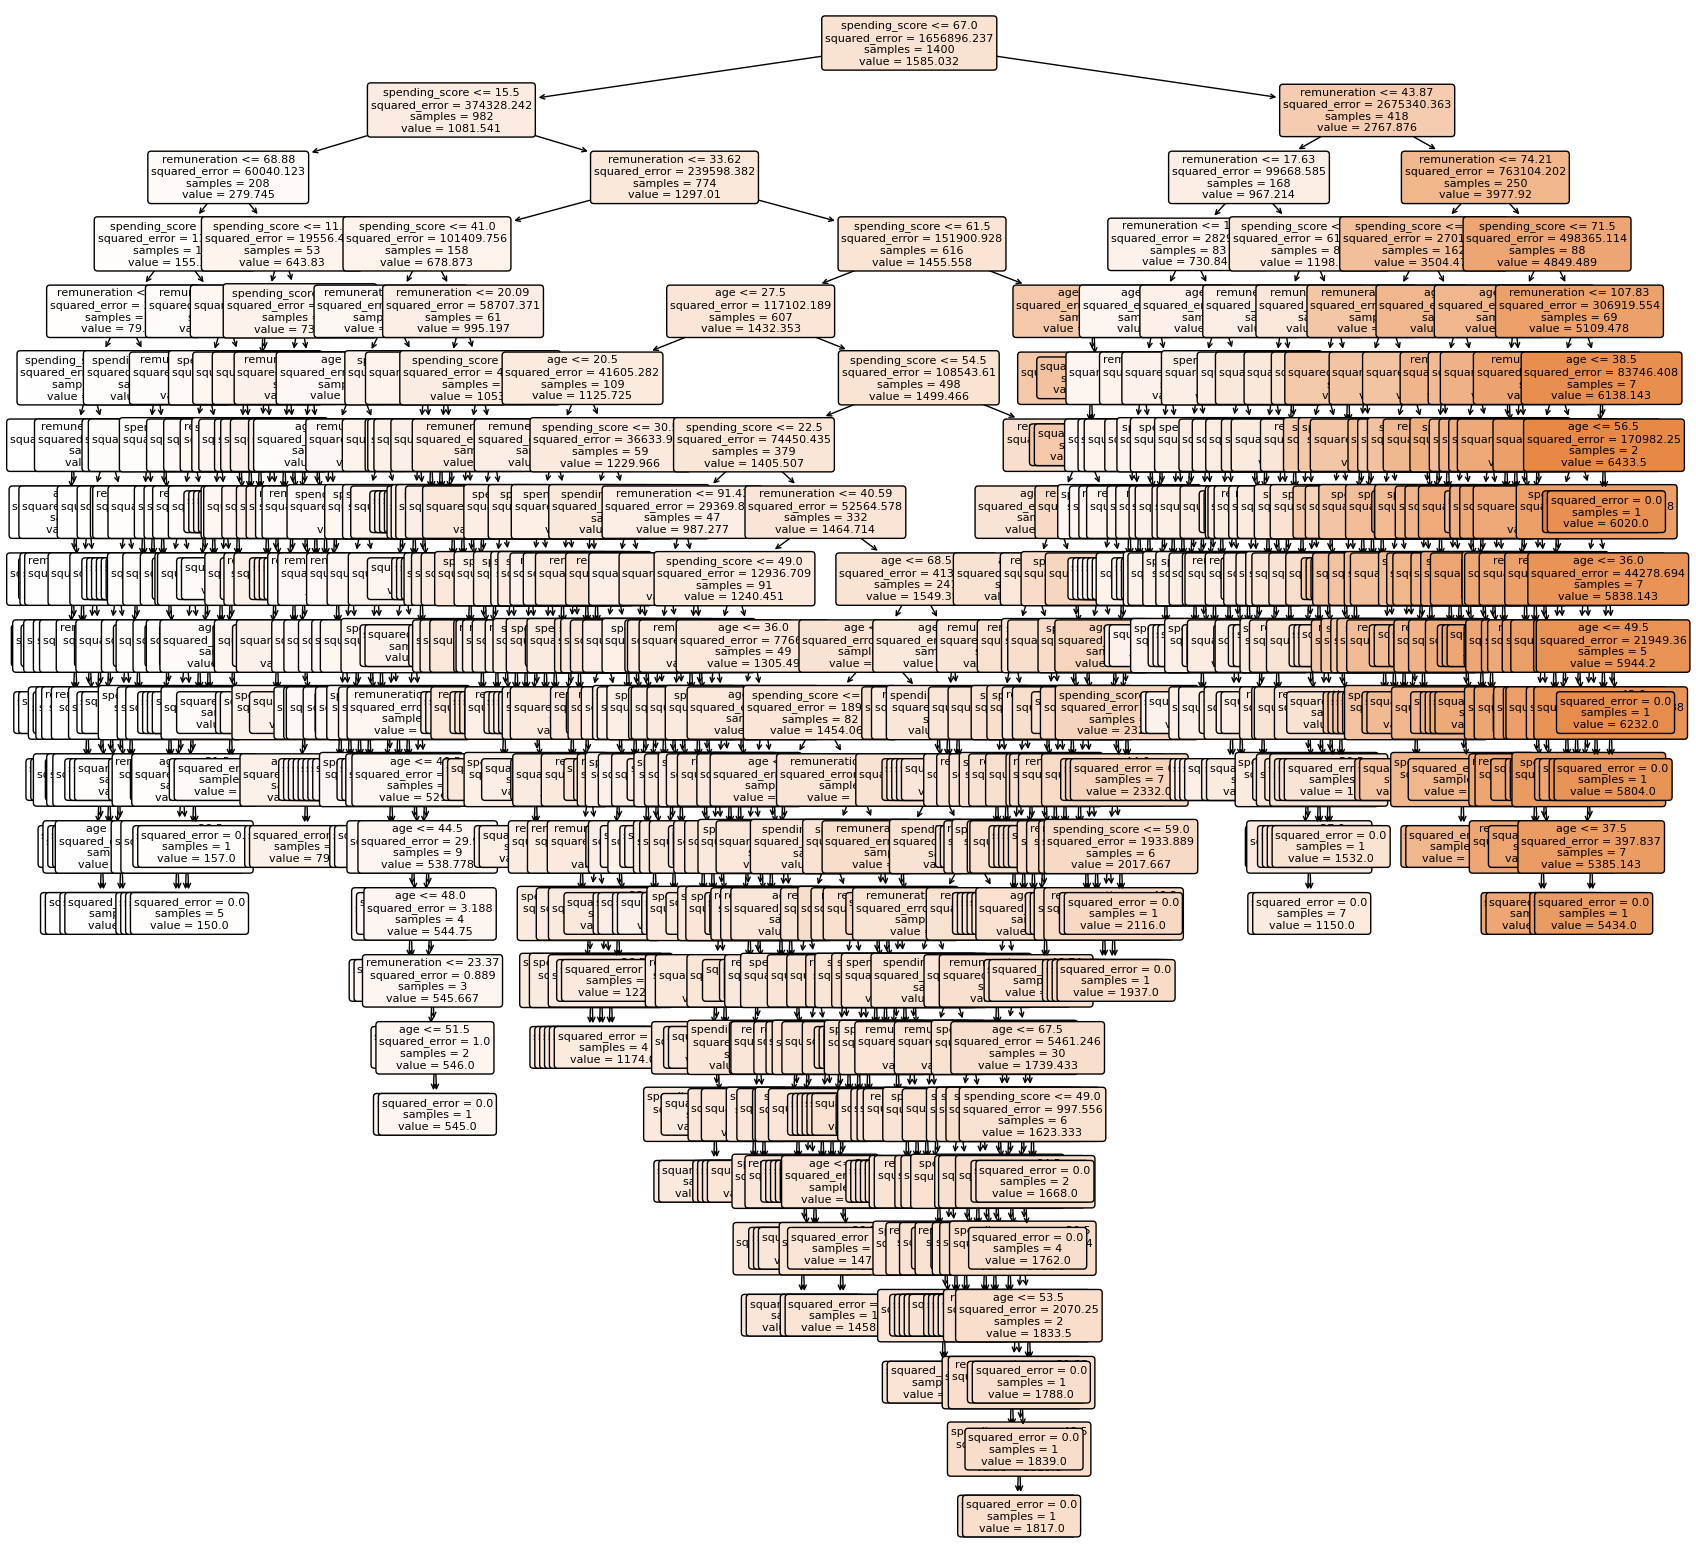

In [241]:
# Set the figure size and create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the decision tree
tree.plot_tree(reg, ax=ax, fontsize=8, filled=True, feature_names=X.columns, rounded=True)

# Show the plot
plt.show()

In [246]:
# Deptgh and number of leaves 
print("Depth:", reg.get_depth())
print("Leaves:", reg.get_n_leaves())

# Calculate  (MAE)
mae = mean_absolute_error(y_train, y_train_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate(MSE)
mse = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r_squared = r2_score(y_train, y_train_predict)
print("R-squared:", r_squared)

Depth: 22
Leaves: 557
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R-squared: 1.0


In [247]:
#   parameters of the regression model
params = reg.get_params()
print(params)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


# Prune the Tree

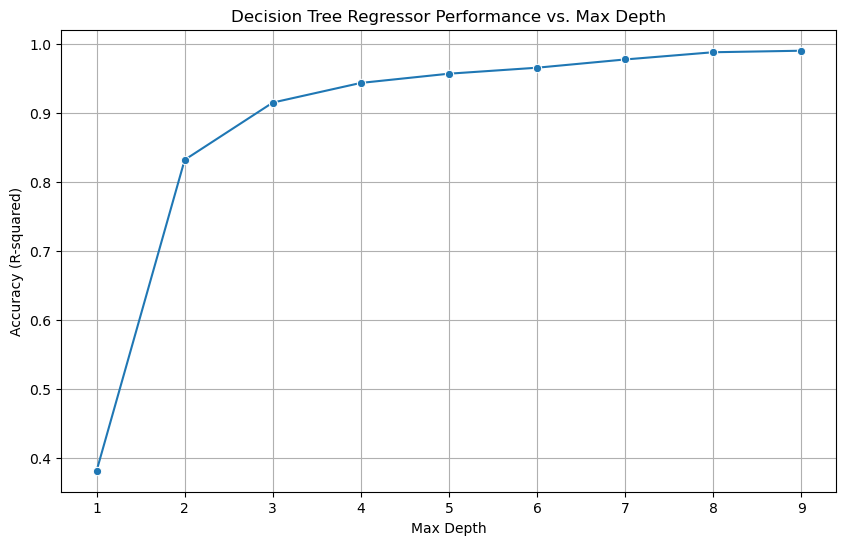

In [248]:
#  max_depth range
depth_range = list(range(1, 10))

# Initialize list to store accuracy scores
accuracy_scores = []

# Iterate over each max_depth value
for depth in depth_range:
    # Instantiate DecisionTreeRegressor with specified max_depth
    d = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Fit the model on the training data
    d.fit(X_train, y_train)
    # Evaluate the model on the testing data and calculate R-squared score
    score = d.score(X_test, y_test)
    # Append the score to the accuracy list
    accuracy_scores.append(score)

# Convert accuracy list to DataFrame
accuracy_df = pd.DataFrame({'Max Depth': depth_range, 'Accuracy': accuracy_scores})

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='Max Depth', y='Accuracy', data=accuracy_df, marker='o')
plt.title('Decision Tree Regressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R-squared)')
plt.xticks(depth_range)
plt.grid(True)
plt.show()

# Plot the pruned tree

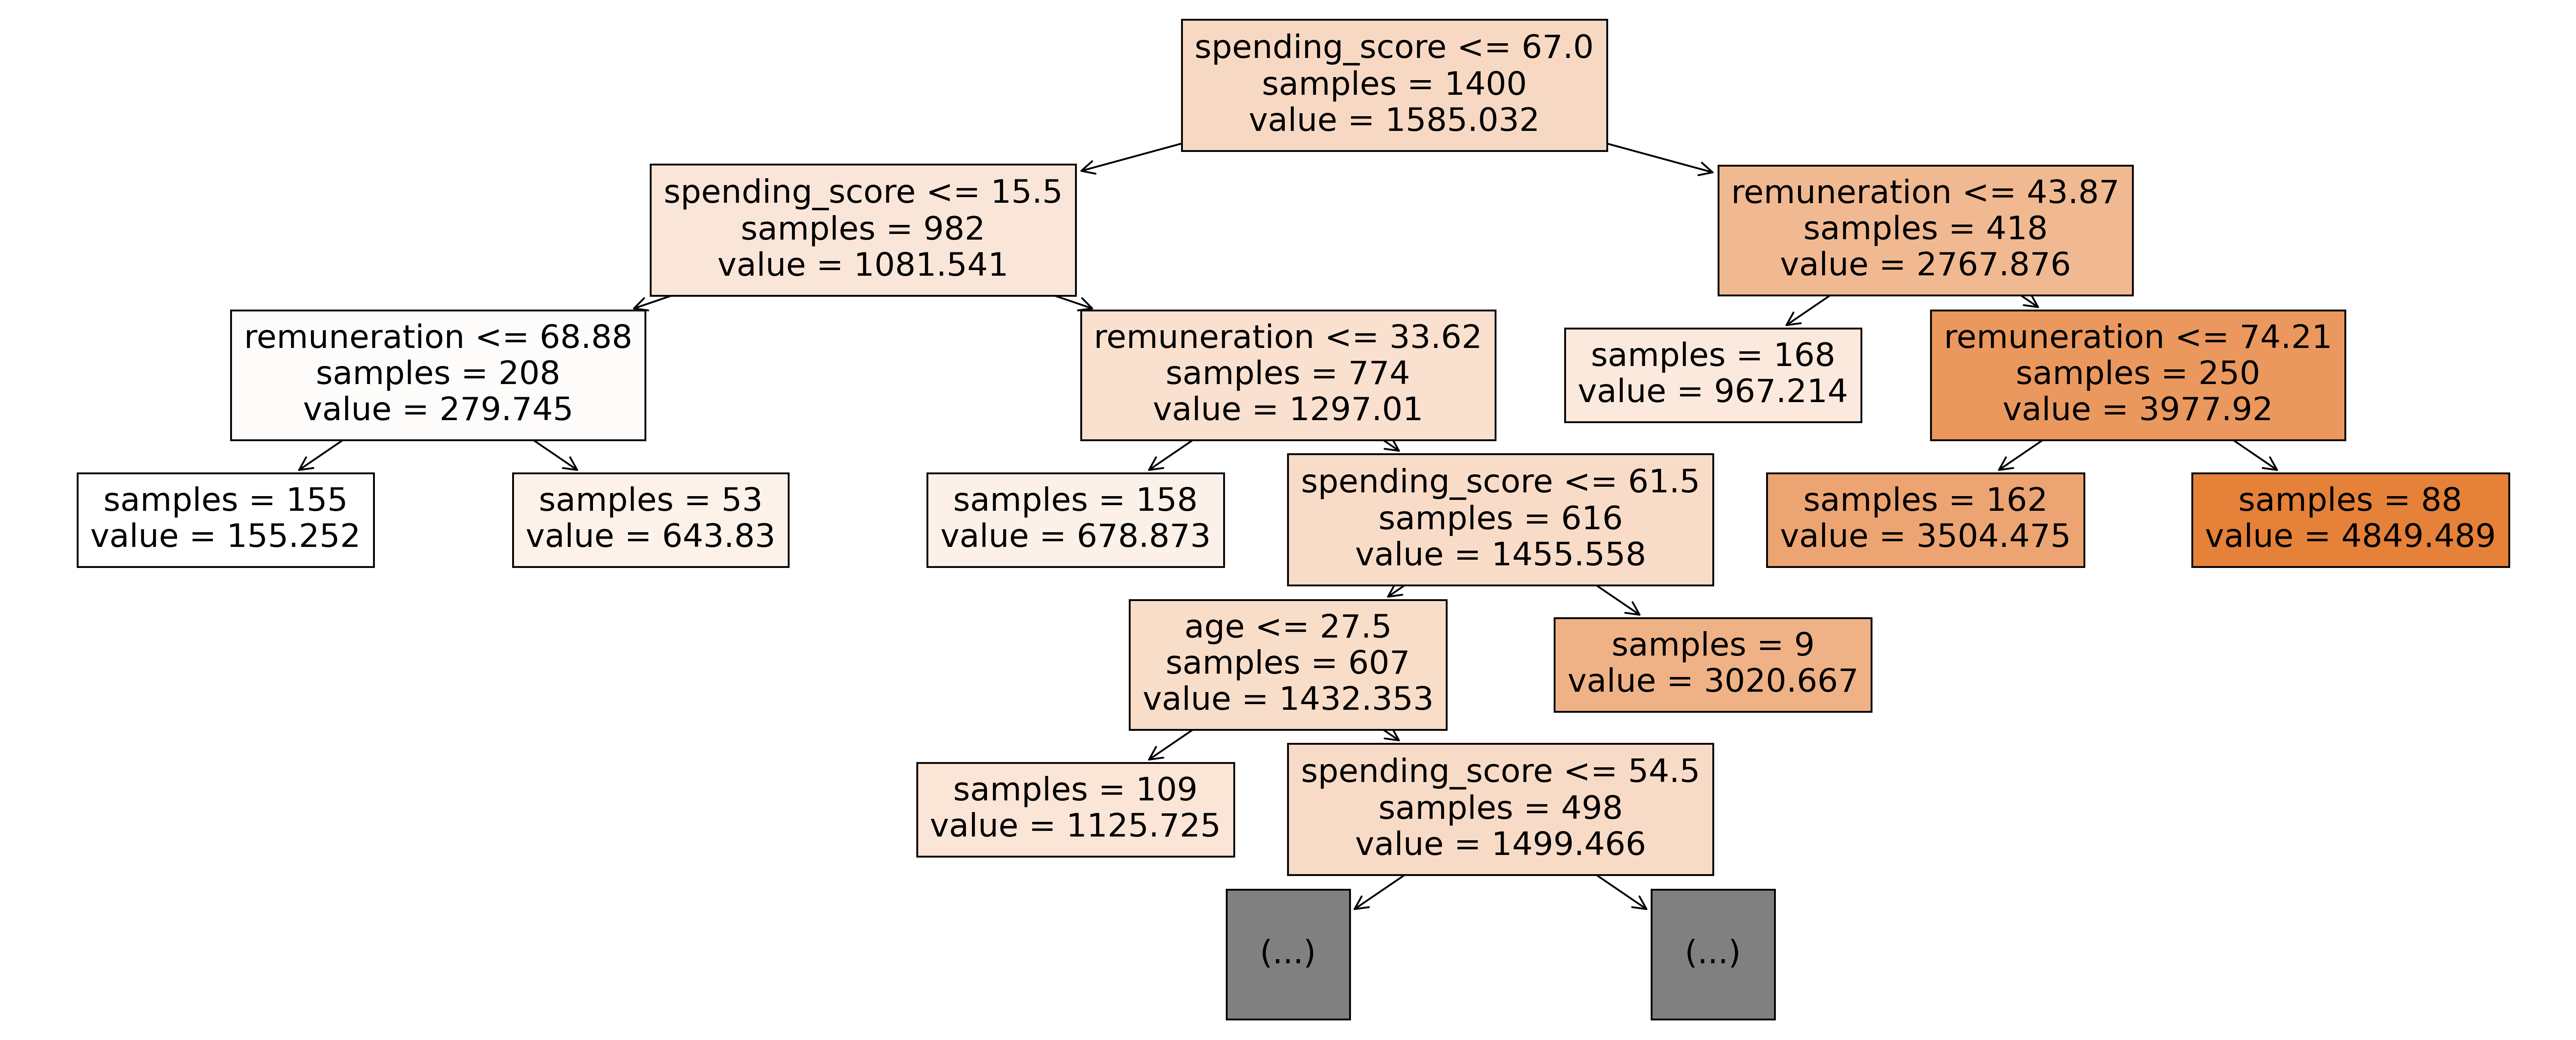

In [245]:
#  DecisionTreeRegressor with min_samples_leaf parameter
dt1 = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=200)

# Fit the Decision Tree using the training data
dt1.fit(X_train, y_train)

# Plot the pruned decision tree, with only the top levels
plt.figure(figsize=[25, 10], dpi=350)
plot_tree(dt1, max_depth=5, feature_names=X.columns, impurity=False, filled=True)

# pruned decision tree
plt.show()

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the **usefulness of renumeration and spending scores** but do not know where to begin. You are tasked to **identify groups within the customer base** that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplo
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [249]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')


1. Import the CSV file you prepared in Module 2.
2. Create a new DataFrame (e.g. df3) containing the remuneration and spending_score columns.
3. Explore the new DataFrame.

In [250]:
df2.columns #recapping the columns of df2

Index(['age', 'remuneration', 'spending_score', 'loyalty_points'], dtype='object')

In [251]:
# Creating df3 with 'remunaration' and 'spending_score' columns from df2
df3 = df2[['remuneration', 'spending_score']]


In [252]:
# Explore the data
print(df3.head(5))

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40


In [253]:
df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


There is no any null score both for remuneration and spending_score

In [254]:
# Explore the data.
df3.drop_duplicates()

remuneration  spending_score
0           12.30              39
1           12.30              81
2           13.12               6
3           13.12              77
4           13.94              40
..            ...             ...
195         98.40              79
196        103.32              28
197        103.32              74
198        112.34              18
199        112.34              83

[196 rows x 2 columns]

In [255]:
df3.shape

(2000, 2)


## 2. Plot

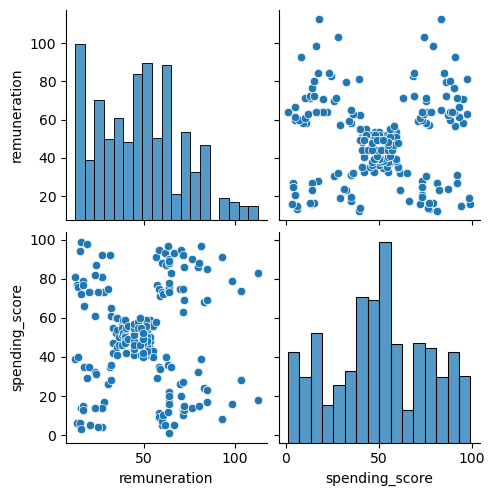

In [256]:
# Create a pairplot
sns.pairplot(df3)

# Show the plot
plt.show()

## 3. Elbow and silhoutte methods

The elbow method is used to determine the optimal number of clusters in *k*-means clustering. However, the elbow method doesn't always work well, especially if the data is not very clustered. 

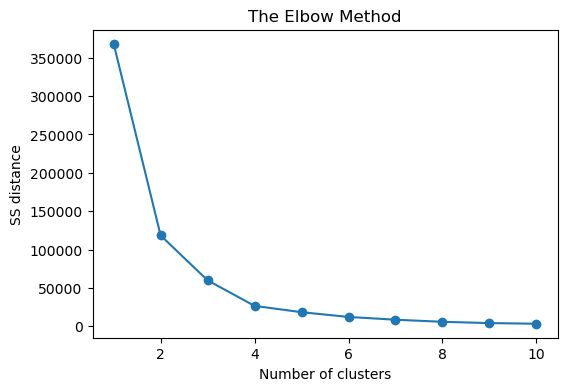

In [257]:
# Determine the number of clusters: Elbow method.

# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=2000,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method with reduced height
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figsize here
ax.plot(range(1, 11), ss, marker='o')

# Insert labels and title.
ax.set_title("The Elbow Method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("SS distance")

plt.show()

The elbow method  encapsulates the challenge that we have in clustering procedures, in that we can think of clustering as a means of a data reduction. In that, to the 2000 objects that we had in the data set, we're trying to reduce them to a smaller number of clusters. So, purely looking at a data reduction perspective, the fewer clusters we have, the greater the data reduction achieved. However, there will be a trade-off. In that, suppose, at the extreme, we just had one cluster.

We're treating all of those 2000 objects as effectively of one type. Well, treating them all as just effectively one group, one super-cluster, this is going to have maximum heterogeneity, maximum variation of the objects within this single cluster. \
And we can see that here, in that we have the largest SS distance value when there's only one cluster. \
So, if we were to now have less data reduction, i.e. a greater number of clusters, and that's a bad thing in data reduction terms, but the benefit we're going to get is greater homogeneity, i.e. greater similarity of objects within those clusters. \
The trade-off: You have more clusters with less data reduction but a smaller SS distance value, i.e. greater homogeneity, which exists in these greater number of clusters. \
So we're trying to find an appropriate sort of compromise between number of clusters and the homogeneity or heterogeneity within them. And so we're trying to find this sort of elbow, this sort of kink to convey the appropriate number of clusters.

**Loooking at the Elbow plot, it looks like 4 to 6 is the ideal number of clusters to maintain a significant level of homogeneity**

# Conclusion - Elbow method = 4 - 6 clusters

# Silhouette method

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


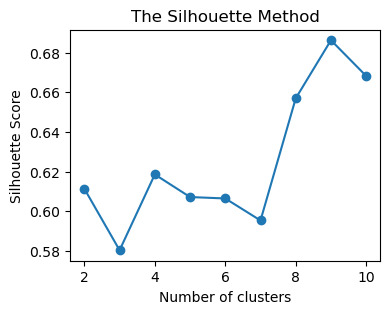

In [259]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k, random_state=42).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))
# Plot the silhouette method with reduced height
fig, ax = plt.subplots(figsize=(4,3))  # Adjust the figsize here
ax.plot(range(2, kmax+1), sil, marker='o')

# Insert labels and title.
ax.set_title("The Silhouette Method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette Score")

plt.show()

Let's use this silhouette score approach. So this is an alternative way of trying to judge, again, the number of clusters. So this will require some judgement on our part as well. So what the **silhouette score does it gives us, or the silhouette coefficient gives us, a measure of similarity of the object to its assigned cluster, with respect to other clusters. So this silhouette score ranges from minus one to plus one. The closer it is to plus one the more similar**. 
We see here, though, that pattern **4** is **preferable** to **5,6,7**

On the silhouette basis, there is a choice here between **4-7**, that would tend to **favour 4**.\
So note this elbow method and silhouette method. They're not providing a cast iron solution to the appropriate number of clusters. We will need to exercise our judgement as well. But, just by a way of example here, let's consider perhaps either three or four-cluster solutions and see how they compare. So if we were to use a three-cluster solution let's produce a pairplot of it. So we are deciding that and specifying that the number of clusters here will be equal to three, and let's have a pairplot.
# Conclusion - Silhoette method = 4 clusters

## 4. Evaluate k-means model at different values of *k*

### Looking for the findings of the plots of both the Silhouette and Elbow Methos, let's start with `k=5` (five clusters).

# 4a) k =5

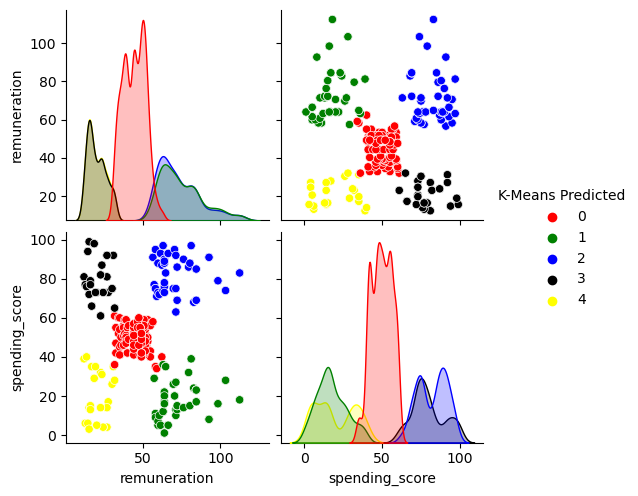

In [261]:

# Use five clusters.
kmeans = KMeans(n_clusters=5, 
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(df3)

clusters = kmeans.labels_

df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind='kde',
             palette=["red", "green", "blue", "black", "yellow"])


In [262]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

In [263]:
# View the K-Means predicted.
df3.head(20)

remuneration  spending_score  K-Means Predicted
0          12.30              39                  4
1          12.30              81                  3
2          13.12               6                  4
3          13.12              77                  3
4          13.94              40                  4
5          13.94              76                  3
6          14.76               6                  4
7          14.76              94                  3
8          15.58               3                  4
9          15.58              72                  3
10         15.58              14                  4
11         15.58              99                  3
12         16.40              15                  4
13         16.40              77                  3
14         16.40              13                  4
15         16.40              79                  3
16         17.22              35                  4
17         17.22              66                  3
18         18.86              29                  4
19         18.86              98                  3

In [264]:
df3.columns

Index(['remuneration', 'spending_score', 'K-Means Predicted'], dtype='object')


# Visualising the clusters.


<Axes: xlabel='remuneration', ylabel='spending_score'>

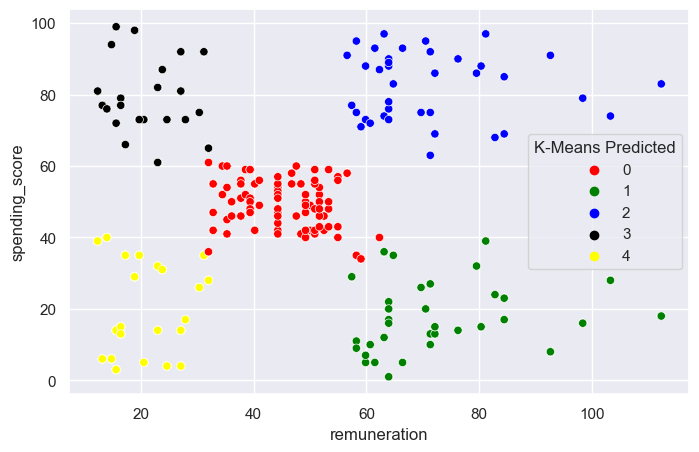

In [265]:

# Set plot size.
sns.set(rc={'figure.figsize':(8, 5)})

# Create a scatterplot.
sns.scatterplot(x='remuneration', 
                y='spending_score',
                data=df3,
                hue='K-Means Predicted',
                palette=["red", "green", "blue", "black", "yellow"])


# 4b) k =4

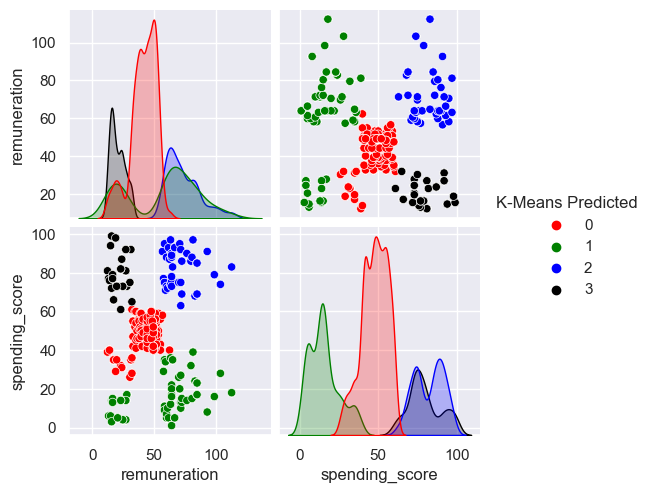

In [266]:

# Use four clusters.
kmeans = KMeans(n_clusters=4, 
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(df3)

clusters = kmeans.labels_

df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind='kde',
             palette=["red", "green", "blue", "black"])


In [267]:

# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
0    877
1    498
2    356
3    269
Name: count, dtype: int64

In [268]:
# View the K-Means predicted.
df3.head(20)

remuneration  spending_score  K-Means Predicted
0          12.30              39                  0
1          12.30              81                  3
2          13.12               6                  1
3          13.12              77                  3
4          13.94              40                  0
5          13.94              76                  3
6          14.76               6                  1
7          14.76              94                  3
8          15.58               3                  1
9          15.58              72                  3
10         15.58              14                  1
11         15.58              99                  3
12         16.40              15                  1
13         16.40              77                  3
14         16.40              13                  1
15         16.40              79                  3
16         17.22              35                  0
17         17.22              66                  3
18         18.86              29                  0
19         18.86              98                  3

In [269]:
df3.columns

Index(['remuneration', 'spending_score', 'K-Means Predicted'], dtype='object')


# Visualising the clusters.


<Axes: xlabel='remuneration', ylabel='spending_score'>

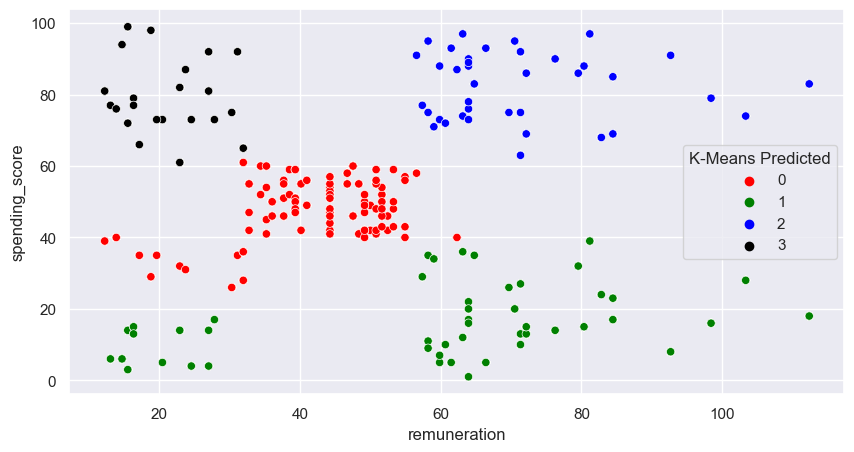

In [270]:
# Set plot size.
sns.set(rc = {'figure.figsize':(10, 5)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df3,
                hue='K-Means Predicted',
                palette=["red", "green", "blue", "black"])


## 7. Discuss: Insights and observations

***Your observations here...***

# Using five clusters may provide a more balanced prediction and better homogeneity in your clusters, leading to more meaningful insights and interpretations of your data.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

In [271]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [272]:
#recapping tr
tr.head(5)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [273]:
tr.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [274]:
# Keep necessary columns. Drop unnecessary columns.
df4 = tr[['review', 'summary']]


# View DataFrame.
df4.head(5)

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [275]:
# Determine if there are any missing values.
df4_na = df4[df4.isna().any(axis=1)]
df4_na.shape

(0, 2)

In [276]:

df4_na.head(5)

Empty DataFrame
Columns: [review, summary]
Index: []

# There is no missing value in the df4 dataset, which contains only the 'review' and 'summary' columns

In [277]:
print(df4)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [278]:
# Review: Change all to lower case and join with a space.
# Function to lowercase and join
def lowercase_and_join(text):
    return ' '.join([word.lower() for word in text.split()])

# Apply the function to the 'summary' and 'reviews' columns
df4['summary'] = df4['summary'].apply(lowercase_and_join)
df4['review'] = df4['review'].apply(lowercase_and_join)

# Output the updated DataFrame
print(df4)

                                                 review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*: your unpainted ...   
2     nice art, nice printing. why two panels are fi...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game. did not think i would like it when...   
1997  great game for all......... keeps the mind nim...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4

In [279]:
df4.head(5)

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [280]:
import pandas as pd

# Function to remove punctuation
def remove_punctuation(text):
    import re  # Import 're' inside the function
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the 'review' column
df4['review'] = df4['review'].apply(remove_punctuation)

# Output the updated DataFrame
print(df4['review'])



0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object


In [281]:
# Replace all the puncuations in summary column.

# Apply the function to the 'summary' column
df4['summary'] = df4['summary'].apply(remove_punctuation)
# View output.
print(df4['summary'])


0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object


### 2c) Drop duplicates in both columns

In [282]:
# Drop duplicates in both columns
df4.drop_duplicates(inplace=True)

# Output the updated DataFrame
print(df4)

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4

## 3. Tokenise and create wordclouds

In [283]:
# Create new DataFrame (copy DataFrame).
df5 = df4
# View DataFrame.
df5.head(5)

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

# Apply tokenisation and Wordcloud to both columns.


# 3a) Review section: tokenisation and worldcloud

  # Tokenisation in review colum

In [284]:
# Import the library.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [285]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

# Get English stop words and all English words
stop_words = set(stopwords.words('english'))
all_english_words = set(words.words())

# Additional common numerical words to remove
common_numerical_words = {'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'}

# Tokenize each comment in the 'review' column into individual words using word_tokenize
df4['review_words'] = df4['review'].apply(word_tokenize)

# Apply pre-processing to each list of words in 'review_words'
df4['review_words'] = df4['review_words'].apply(lambda x: [y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words and not any(char.isdigit() for char in y) and y.lower() not in common_numerical_words])

# View results
print(df4['review_words'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


0       [comes, screen, space, screen, absolute, premi...
1       [open, letter, unpainted, bad, spell, great, b...
2       [nice, art, nice, printing, filled, general, f...
3              [amazing, buy, bought, gift, new, perfect]
4       [review, previous, completely, unnecessary, ne...
                              ...                        
1995    [perfect, word, game, mixed, perhaps, giving, ...
1996    [great, game, think, would, like, first, recei...
1997                          [great, game, mind, nimble]
1998                                          [fun, game]
1999    [game, fun, lot, like, scrabble, without, litt...
Name: review_words, Length: 1961, dtype: object


# create a to dataframe only with reviews

In [286]:
# Tokenize each comment in the 'review' column into individual words using word_tokenize
review_words = [word_tokenize(review) for review in df4['review']]

# View results
review_words

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
  'great',
  'your',
 

# now create an wordcloud for review column

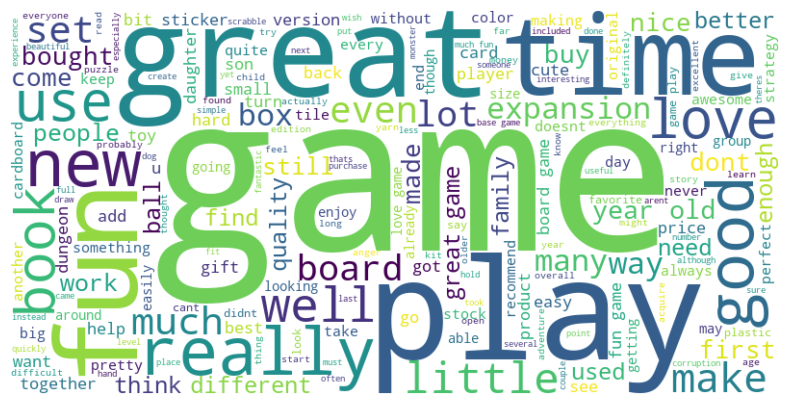

In [287]:
# Combine all words into a single string
review_text = ' '.join(df4['review_words'].explode().dropna())

# Create a WordCloud object
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(review_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')  # <- Corrected variable name
plt.axis('off')
plt.show()


In [288]:
df4.columns

Index(['review', 'summary', 'review_words'], dtype='object')

# 3b) Tokenization and Worldcloud for 'SUMMARY'

In [289]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

# Get English stop words and all English words
stop_words = set(stopwords.words('english'))
all_english_words = set(words.words())

# Tokenize each comment in the 'review' column into individual words using word_tokenize
df4['summary_words'] = df4['summary'].apply(word_tokenize)

# Apply pre-processing to each list of words in 'review_words', REMOVING ALPHAN
df4['summary_words'] = df4['summary_words'].apply(lambda x: [y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words and not any(char.isdigit() for char in y) and y.lower() not in common_numerical_words])

# View results
df4['summary_words']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\fuyo8001\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


0       [fact, space, wasted, art, terribly, informati...
1                   [another, worthless, dungeon, screen]
2                         [pretty, also, pretty, useless]
3                                                      []
4                                           [money, trap]
                              ...                        
1995                         [perfect, word, game, mixed]
1996                                         [super, fun]
1997                                        [great, game]
1998                                                   []
1999                                         [love, game]
Name: summary_words, Length: 1961, dtype: object

# create a to dataframe only with summary

In [290]:
# Tokenize each comment in the 'summary' column into individual words using word_tokenize
summary_words = [word_tokenize(summary) for summary in df4['summary']]

# View results
summary_words

[['the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art'],
 ['another',
  'worthless',
  'dungeon',
  'masters',
  'screen',
  'from',
  'galeforce9'],
 ['pretty', 'but', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'but', 'could', 'be', 'even', 'better'],
 ['another',
  'missed',
  'opportunity',
  'not',
  'a',
  'value',
  'add',
  'to',
  'the',
  'product',
  'line'],
 ['five', 'stars'],
 ['love', 'the', 'map'],
 ['not', 'a', 'general', 'dm', 'screen'],
 ['very', 'weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'was', 'a', 'card', 'mommer'],
 ['very', 'advanced', 'but', 'as', 'good', 'as', 'it', 'gets'],
 ['you', 'better', 'know', 'what', 'youre', 'getting', 'into'],
 ['dont', 'bother'],
 ['the', 'w

# now create an wordcloud for SUMMARY column

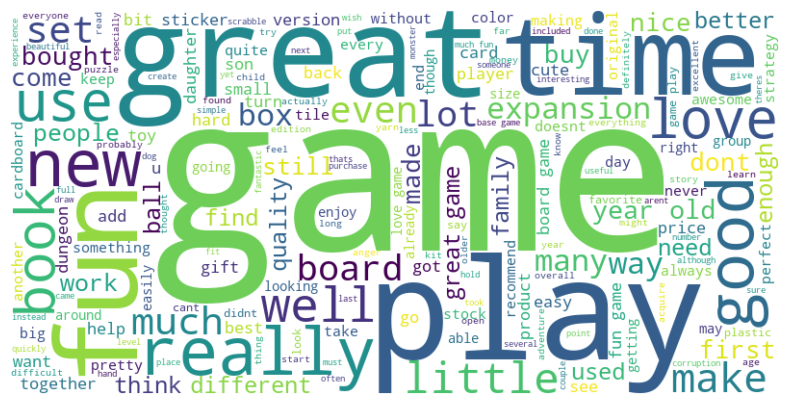

In [291]:
# Combine all words into a single string
summary_text = ' '.join(df4['summary_words'].explode().dropna())

# Create a WordCloud object
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')  # <- Corrected variable name
plt.axis('off')
plt.show()

# As both columns , 'summary' and 'reviews' show very similar outputs, I will keep with the 'review' column only in the following steps to proceed with the frequency and polarity analysis

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

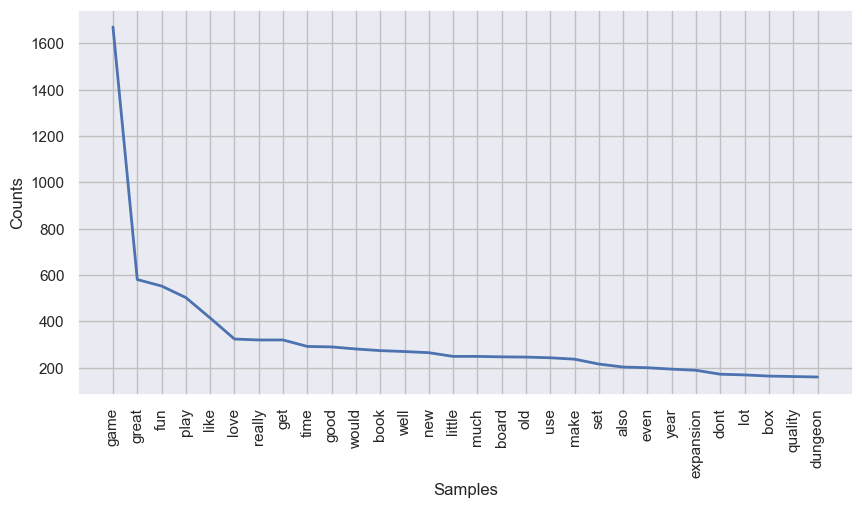

In [293]:
# Import the class.
from nltk.probability import FreqDist

# Flatten the list of lists into a single list of words
review_words = [word for sublist in df4['review_words'] for word in sublist]

# Create a frequency distribution object
freq_dist_of_words = FreqDist(review_words)

# Plot the most common words
plt.figure(figsize=(10, 5))
freq_dist_of_words.plot(30, cumulative=False)
plt.show()

In [294]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(review_words)

# Preview the data.
fdist1

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'time': 291, 'good': 289, ...})

# Top 15 Most Common Word

In [295]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(review_words).most_common(15),
                      columns=['Word', 'Frequency'])

# Reset the index
counts = counts.reset_index(drop=True)

# Preview data
print(counts)

      Word  Frequency
0     game       1671
1    great        580
2      fun        552
3     play        502
4     like        414
5     love        323
6   really        319
7      get        319
8     time        291
9     good        289
10   would        280
11    book        273
12    well        269
13     new        264
14  little        248


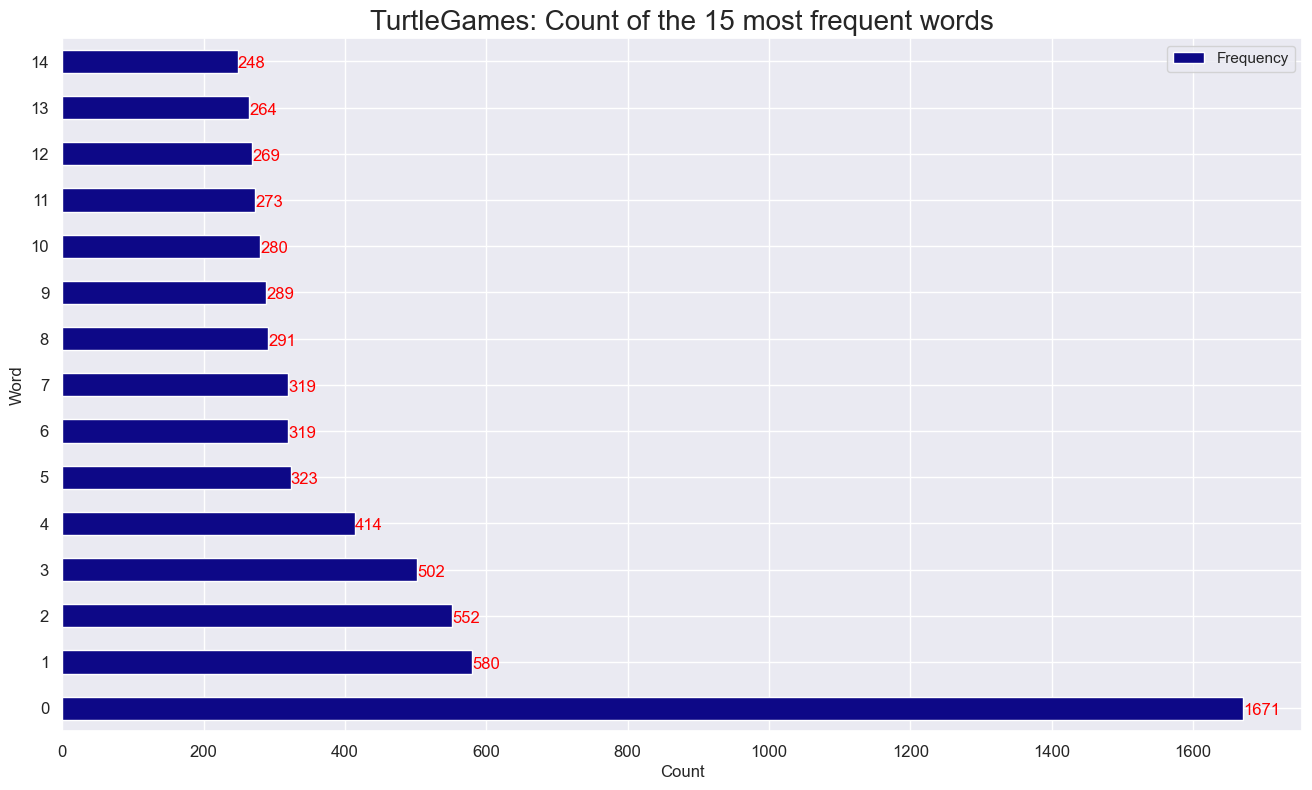

In [296]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("TurtleGames: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Textblob
**TextBlob** is used for general purpose text. 
TextBlob identifies the **polarity** and **subjectivity** of a statement\
**Sentiment polarity** scores are assigned on a **-1 to +1 range**, where **-1(lowest negative sentiment) and +1 (the highest possible positive sentiment)**.\
**Subjectivity** ranges from **0 to 1**, where **0 means fact-based and objective**, while **1 means opinion-based and subjective**.

In [297]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

# Example 1:
TextBlob("My cute little pet mouse loves to eat from my hand, I love how it tickles").sentiment

Sentiment(polarity=0.2708333333333333, subjectivity=0.7000000000000001)

### 4d) Identify 15 most common words and polarity

Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [298]:
counts

Word  Frequency
0     game       1671
1    great        580
2      fun        552
3     play        502
4     like        414
5     love        323
6   really        319
7      get        319
8     time        291
9     good        289
10   would        280
11    book        273
12    well        269
13     new        264
14  little        248

In [299]:
counts.columns

Index(['Word', 'Frequency'], dtype='object')

In [300]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
counts['polarity'] = counts['Word'].apply(generate_polarity)

# Preview the result.
counts['polarity'].head()

0   -0.4
1    0.8
2    0.3
3    0.0
4    0.0
Name: polarity, dtype: float64

In [301]:
counts.head()

Word  Frequency  polarity
0   game       1671      -0.4
1  great        580       0.8
2    fun        552       0.3
3   play        502       0.0
4   like        414       0.0

# Polarity of the top 15 words ranked by frequency

In [302]:
# Sort the DataFrame by 'Frequency' in descending order
counts_sorted = counts.sort_values(by='Frequency', ascending=False)

# Take the top 15 rows
top_15_words = counts_sorted.head(15)

# Display the top 15 words with their frequencies and polarity
top_15_words.head(15)

Word  Frequency  polarity
0     game       1671 -0.400000
1    great        580  0.800000
2      fun        552  0.300000
3     play        502  0.000000
4     like        414  0.000000
5     love        323  0.500000
6   really        319  0.200000
7      get        319  0.000000
8     time        291  0.000000
9     good        289  0.700000
10   would        280  0.000000
11    book        273  0.000000
12    well        269  0.000000
13     new        264  0.136364
14  little        248 -0.187500

the VADER sentiment analysis provides a measure of the text's sentiment on a **scale from -1 to 1**. Here's what these scores generally represent:\

A **positive** sentiment score (POS) is typically anything **above or equal to 0.05** (>=5%) \
A **neutral** sentiment score (NEU) is usually **between -0.05 and 0.05**. (-%5<vader<+5%) \
A **negative** sentiment score (NEG) is typically anything **below or equal to -0.05** (<-5%)\

These thresholds can sometimes be adjusted depending on the specific needs of the analysis, but these are the default settings for VADER.

# Get the top 15 most negative words in review

In [303]:
# Get the top 15 most positive cleaned 
counts.sort_values('polarity', ascending=1).head(15)

Word  Frequency  polarity
0     game       1671 -0.400000
14  little        248 -0.187500
3     play        502  0.000000
4     like        414  0.000000
7      get        319  0.000000
8     time        291  0.000000
10   would        280  0.000000
11    book        273  0.000000
12    well        269  0.000000
13     new        264  0.136364
6   really        319  0.200000
2      fun        552  0.300000
5     love        323  0.500000
9     good        289  0.700000
1    great        580  0.800000

# apply polarity in the full datasets

In [304]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for REVIEW
df4['polarity_review'] = df4['review'].apply(generate_polarity)

# Populate a new column with polarity scores for SUMMARY
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4.head(5)

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                        review_words  \
0  [comes, screen, space, screen, absolute, premi...   
1  [open, letter, unpainted, bad, spell, great, b...   
2  [nice, art, nice, printing, filled, general, f...   
3         [amazing, buy, bought, gift, new, perfect]   
4  [review, previous, completely, unnecessary, ne...   

                                       summary_words  polarity_review  \
0  [fact, space, wasted, art, terribly, informati...        -0.036111   
1              [another, worthless, dungeon, screen]         0.035952   
2                    [pretty, also, pretty, useless]         0.116640   
3                                                 []         0.578788   
4                                      [money, trap]        -0.316667   

   polarity_summary  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

# subjectivity

In [305]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity_review'] = df4['review'].apply(generate_subjectivity)

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity_summary'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4.head(5)

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                        review_words  \
0  [comes, screen, space, screen, absolute, premi...   
1  [open, letter, unpainted, bad, spell, great, b...   
2  [nice, art, nice, printing, filled, general, f...   
3         [amazing, buy, bought, gift, new, perfect]   
4  [review, previous, completely, unnecessary, ne...   

                                       summary_words  polarity_review  \
0  [fact, space, wasted, art, terribly, informati...        -0.036111   
1              [another, worthless, dungeon, screen]         0.035952   
2                    [pretty, also, pretty, useless]         0.116640   
3                                                 []         0.578788   
4                                      [money, trap]        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

# Histogram of Polarity Score

We want to see whether the comments are biased to a particularly strong sentiment. A histogram chart will help us to assess this bias visually. This approach gives us a general sense of the citizens' feelings about street safety.


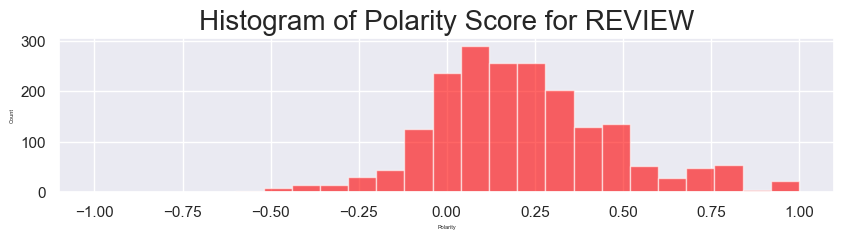

In [307]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(10,2))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=4)
plt.ylabel('Count', fontsize=4)
plt.title('Histogram of Polarity Score for REVIEW', fontsize=20)

plt.show()

**Most of reviews are concentrated in the positives scores, showing an overall postivie sentiment amomng reviews**

#  Polarity Score of SUMMARY

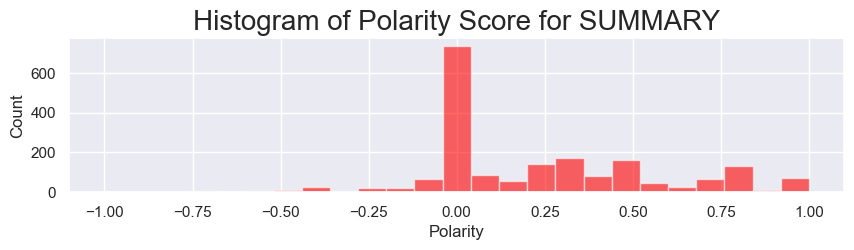

In [308]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(10,2))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Polarity Score for SUMMARY', fontsize=20)

plt.show()

# Subjectivity Scores

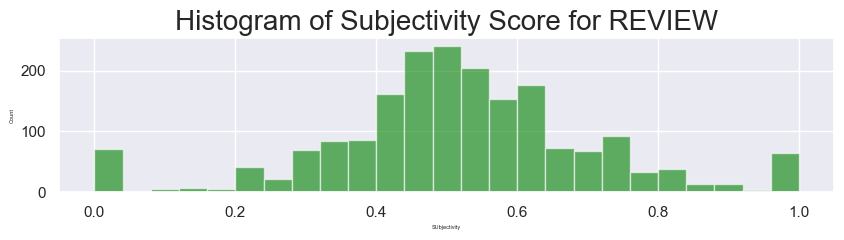

In [320]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(10,2))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_review'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('SUbjectivity', fontsize=4)
plt.ylabel('Count', fontsize=4)
plt.title('Histogram of Subjectivity Score for REVIEW', fontsize=20)

plt.show()

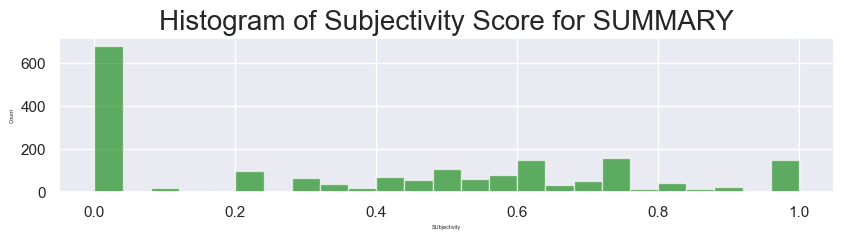

In [321]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(10,2))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_summary'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('SUbjectivity', fontsize=4)
plt.ylabel('Count', fontsize=4)
plt.title('Histogram of Subjectivity Score for SUMMARY', fontsize=20)

plt.show()

The summary histogram also shows a right-tailed distribution, indicating an overall positive sentiment.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [322]:
#create a column with reviews and polarity_review only

review_df = df4[['review','polarity_review']]
review_df.head(5)

review  polarity_review
0  when it comes to a dms screen the space on the...        -0.036111
1  an open letter to galeforce9 your unpainted mi...         0.035952
2  nice art nice printing why two panels are fill...         0.116640
3  amazing buy bought it as a gift for our new dm...         0.578788
4  as my review of gf9s previous screens these we...        -0.316667

In [323]:
# Top 20 positive reviews.

top20_positive_reviews = review_df.nlargest(20, 'polarity_review')
# Reset the index
top20_positive_reviews = top20_positive_reviews.reset_index(drop=True)
# View output.
top20_positive_reviews.sort_values(by='polarity_review', ascending=False)

review  polarity_review
0                           came in perfect condition              1.0
1                                        awesome book              1.0
18  it is the best thing to play with and also min...              1.0
17                                        awesome toy              1.0
16  this was perfect to go with the 7 bean bags  i...              1.0
15  my daughter loves her stickers awesome seller ...              1.0
14  one of the best board games i played in along ...              1.0
13                                        its awesome              1.0
12               awesome addition to my rpg gm system              1.0
11               best set buy 2 if you have the means              1.0
10                                        awesome set              1.0
9                                             awesome              1.0
8                                             perfect              1.0
7   wonderful for my grandson to learn the resurre...              1.0
6                                  delightful product              1.0
5                                   wonderful product              1.0
4                         perfect just what i ordered              1.0
3   excellent activity for teaching selfmanagement...              1.0
2                                        awesome gift              1.0
19                  excellent toy to simulate thought              1.0

In [324]:
# Top 20 negative reviews.

top20_negative_reviews = review_df.nsmallest(20, 'polarity_review')
# Reset the index
top20_negative_reviews = top20_negative_reviews.reset_index(drop=True)
# View output.
top20_negative_reviews.sort_values(by='polarity_review', ascending=True)

review  polarity_review
0   booo unles you are patient know how to measure...        -1.000000
1                   incomplete kit very disappointing        -0.780000
2   im sorry i just find this product to be boring...        -0.583333
3   one of my staff will be using this game soon s...        -0.550000
8                                           difficult        -0.500000
7              instructions are complicated to follow        -0.500000
9                          expensive for what you get        -0.500000
5   this was a gift for my daughter i found it dif...        -0.500000
4   i bought this as a christmas gift for my grand...        -0.500000
6                    i found the directions difficult        -0.500000
10  i sent this product to my granddaughter the po...        -0.491667
11  my 8 yearold granddaughter and i were very fru...        -0.446250
12  i purchased this on the recommendation of two ...        -0.440741
13                very hard complicated to make these        -0.439583
18        i bought this for my son he loves this game        -0.400000
14                    kids i work with like this game        -0.400000
15  this game although it appears to be like uno a...        -0.400000
16  my son loves playing this game it was recommen...        -0.400000
17                               this game is a blast        -0.400000
19            was a gift for my son he loves the game        -0.400000

In [325]:
#create a column with summary and polarity_summary only

summary_df = df4[['summary','polarity_summary']]
summary_df.head(5)

summary  polarity_summary
0  the fact that 50 of this space is wasted on ar...              0.15
1  another worthless dungeon masters screen from ...             -0.80
2                     pretty but also pretty useless              0.00
3                                         five stars              0.00
4                                         money trap              0.00

In [326]:
# Top 20 positive summaries.

top20_positive_summaries = summary_df.nlargest(20, 'polarity_summary')
# Reset the index
top20_positive_summaries = top20_positive_summaries.reset_index(drop=True)
# View output.
top20_positive_summaries.sort_values(by='polarity_summary', ascending=False)

summary  polarity_summary
0                                 best gm screen ever               1.0
1                                   wonderful designs               1.0
18                                     awesome puzzle               1.0
17              all f the mudpuppy toys are wonderful               1.0
16                                          wonderful               1.0
15                          best easter teaching tool               1.0
14  the pigeon is the perfect addition to a school...               1.0
13                             excellent therapy tool               1.0
12                                          excellent               1.0
11                                          excellent               1.0
10                                            perfect               1.0
9            awesome and welldesigned for 9 year olds               1.0
8                                             awesome               1.0
7                     he was very happy with his gift               1.0
6                                        awesome book               1.0
5              awesome sticker activity for the price               1.0
4                             perfect for preschooler               1.0
3   theyre the perfect size to keep in the car or ...               1.0
2                                             perfect               1.0
19                               not the best quality               1.0

In [327]:
# Top 20 negatives summaries.

top20_negatves_summaries = summary_df.nsmallest(20, 'polarity_summary')
# Reset the index
top20_negatves_summaries = top20_negatves_summaries.reset_index(drop=True)
# View output.
top20_negatves_summaries.sort_values(by='polarity_summary', ascending=True)


summary  polarity_summary
0                       the worst value ive ever seen         -1.000000
1    boring unless you are a craft person which i am          -1.000000
2                                              boring         -1.000000
3   before this i hated running any rpg campaign d...         -0.900000
4   another worthless dungeon masters screen from ...         -0.800000
5                                        disappointed         -0.750000
6                                        disappointed         -0.750000
7                                        disappointed         -0.750000
8                                        disappointed         -0.750000
9   promotes anger instead of teaching calming met...         -0.700000
10           too bad this is not what i was expecting         -0.700000
11                       bad qualityall made of paper         -0.700000
12    at age 31 i found these very difficult to make          -0.650000
13                                   small and boring         -0.625000
14                                         mad dragon         -0.625000
15                                      disappointing         -0.600000
16                                      disappointing         -0.600000
17                                      disappointing         -0.600000
18                                      disappointing         -0.600000
19  then you will find this board game to be dumb ...         -0.591667

## 7. Discuss: Insights and observations

***Your observations here...***

# Overall, consumers show a positive sentiment towards TG, with conditions, set and the product mentioned in top positive reviews. However, there are complaints about the games' difficulty and complexity and instructions.

# 